# **Convolution Neural Network (CNN)**

### **Mouting the Dataset Folder**

In [7]:
cd

/root


In [10]:
cd '/content/drive/MyDrive/IBM'

/content/drive/MyDrive/IBM


In [11]:
pwd

'/content/drive/MyDrive/IBM'

# **Unzipping the folder**

In [34]:
!unzip fruit-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruit-dataset/train/Apple___Black_rot/f0919147-209f-4a73-be01-42a5f160d51b___JR_FrgE.S 3056.JPG  
  inflating: fruit-dataset/train/Apple___Black_rot/f14af5e9-087d-4040-9eb2-c2672d513e36___JR_FrgE.S 2972.JPG  
  inflating: fruit-dataset/train/Apple___Black_rot/f15c02d9-9aa6-45b5-84fc-97e22f7fabaa___JR_FrgE.S 2831.JPG  
  inflating: fruit-dataset/train/Apple___Black_rot/f1844803-f6fb-4cfb-851e-b9095fb40c9e___JR_FrgE.S 2898.JPG  
  inflating: fruit-dataset/train/Apple___Black_rot/f1931320-4177-4453-93fd-3decee538b51___JR_FrgE.S 8707.JPG  
  inflating: fruit-dataset/train/Apple___Black_rot/f24c943a-6339-48a5-bfb0-b866c926dc16___JR_FrgE.S 2931.JPG  
  inflating: fruit-dataset/train/Apple___Black_rot/f2b3cfad-a6a4-4d2c-b56a-3f323b497e87___JR_FrgE.S 2780.JPG  
  inflating: fruit-dataset/train/Apple___Black_rot/f2b57a5b-f46d-453a-bb33-21d01d8a10de___JR_FrgE.S 3036.JPG  
  inflating: fruit-dataset/train/Apple___Black_rot/f3297583-9

## **Image Augmentation**

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [37]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [38]:
pwd

'/content/drive/MyDrive/IBM'

In [39]:
ls

fruit-dataset/  fruit-dataset.zip  Veg-dataset.zip


In [43]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/IBM/fruit-dataset/train',target_size=(128,128),class_mode='categorical',batch_size=24)

Found 5384 images belonging to 6 classes.


In [44]:
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/IBM/fruit-dataset/test',target_size=(128,128),class_mode='categorical',batch_size=24)

Found 1686 images belonging to 6 classes.


In [45]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

## **CNN**

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [48]:
model=Sequential()

In [49]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [50]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [51]:
model.add(Flatten())

Hidden Layer

In [52]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

Output Layer

In [53]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [55]:
model.add(Dense(6,activation='softmax')) #Softmax for multiclass, 6 for number of classes

In [56]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [58]:
len(x_train) #No of iterations for 1238 images

225

In [59]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
225/225 [==============================] - 166s 732ms/step - loss: 1.6828 - accuracy: 0.3349 - val_loss: 1.6946 - val_accuracy: 0.2924
Epoch 2/10
225/225 [==============================] - 167s 739ms/step - loss: 1.6524 - accuracy: 0.3351 - val_loss: 1.6671 - val_accuracy: 0.2924
Epoch 3/10
225/225 [==============================] - 168s 746ms/step - loss: 1.6446 - accuracy: 0.3351 - val_loss: 1.6548 - val_accuracy: 0.2924
Epoch 4/10
225/225 [==============================] - 171s 758ms/step - loss: 1.6425 - accuracy: 0.3351 - val_loss: 1.6500 - val_accuracy: 0.2924
Epoch 5/10
225/225 [==============================] - 169s 752ms/step - loss: 1.6418 - accuracy: 0.3351 - val_loss: 1.6481 - val_accuracy: 0.2924
Epoch 6/10
225/225 [==============================] - 163s 724ms/step - loss: 1.6417 - accuracy: 0.3351 - val_loss: 1.6472 - val_accuracy: 0.2924
Epoch 7/10
225/225 [==============================] - 168s 745ms/step - loss: 1.6417 - accuracy: 0.3351 - val_loss: 1.6463 -

In [60]:
ls

fruit-dataset/  fruit-dataset.zip  Veg-dataset.zip


In [61]:
model.save('fruits.h5')

In [62]:
ls

fruit-dataset/  fruit-dataset.zip  fruits.h5  Veg-dataset.zip


In [63]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [64]:
model=load_model('fruits.h5')

In [65]:
pwd

'/content/drive/MyDrive/IBM'

In [76]:
img=image.load_img("/content/drive/MyDrive/IBM/fruit-dataset/test/Apple___healthy/0d01a8a3-9faa-4a1f-afe0-be6bffa42056___RS_HL 6204.JPG")

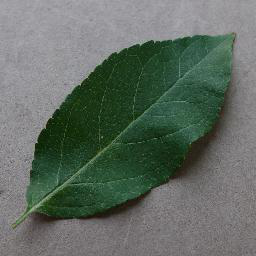

In [77]:
img

In [78]:
img=image.load_img("/content/drive/MyDrive/IBM/fruit-dataset/test/Apple___healthy/0d01a8a3-9faa-4a1f-afe0-be6bffa42056___RS_HL 6204.JPG",target_size=(128,128))

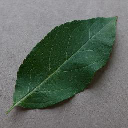

In [79]:
img

In [80]:
x=image.img_to_array(img) # See the pixel values
x

array([[[155., 154., 159.],
        [158., 157., 162.],
        [163., 162., 167.],
        ...,
        [152., 152., 154.],
        [153., 153., 155.],
        [154., 154., 156.]],

       [[161., 160., 165.],
        [161., 160., 165.],
        [160., 159., 164.],
        ...,
        [151., 151., 153.],
        [155., 155., 157.],
        [159., 159., 161.]],

       [[165., 164., 169.],
        [164., 163., 168.],
        [163., 162., 167.],
        ...,
        [159., 159., 161.],
        [155., 155., 157.],
        [149., 149., 151.]],

       ...,

       [[119., 115., 114.],
        [129., 125., 124.],
        [118., 114., 113.],
        ...,
        [109., 105., 106.],
        [125., 121., 122.],
        [106., 102., 103.]],

       [[112., 108., 107.],
        [122., 118., 117.],
        [129., 125., 124.],
        ...,
        [106., 102., 103.],
        [117., 113., 114.],
        [118., 114., 115.]],

       [[118., 114., 113.],
        [125., 121., 120.],
        [107., 1

In [81]:
x.ndim

3

In [82]:
x.shape

(128, 128, 3)

In [83]:
x=np.expand_dims(x,axis=0)

In [84]:
x

array([[[[155., 154., 159.],
         [158., 157., 162.],
         [163., 162., 167.],
         ...,
         [152., 152., 154.],
         [153., 153., 155.],
         [154., 154., 156.]],

        [[161., 160., 165.],
         [161., 160., 165.],
         [160., 159., 164.],
         ...,
         [151., 151., 153.],
         [155., 155., 157.],
         [159., 159., 161.]],

        [[165., 164., 169.],
         [164., 163., 168.],
         [163., 162., 167.],
         ...,
         [159., 159., 161.],
         [155., 155., 157.],
         [149., 149., 151.]],

        ...,

        [[119., 115., 114.],
         [129., 125., 124.],
         [118., 114., 113.],
         ...,
         [109., 105., 106.],
         [125., 121., 122.],
         [106., 102., 103.]],

        [[112., 108., 107.],
         [122., 118., 117.],
         [129., 125., 124.],
         ...,
         [106., 102., 103.],
         [117., 113., 114.],
         [118., 114., 115.]],

        [[118., 114., 113.],
       

In [85]:
y=np.argmax(model.predict(x),axis=1)

In [86]:
y

array([4])

In [87]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

Predicting the image: Elephant

In [91]:
img=image.load_img("/content/drive/MyDrive/IBM/fruit-dataset/test/Apple___healthy/0d01a8a3-9faa-4a1f-afe0-be6bffa42056___RS_HL 6204.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']
index[y[0]]

'Peach___Bacterial_spot'

End of the File